In [1]:
import ants
import numpy as np
import pandas as pd
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
def sphere(shape, radius, position):
    """Generate an n-dimensional spherical mask."""
    # assume shape and position have the same length and contain ints
    # the units are pixels / voxels (px for short)
    # radius is a int or float in px
    assert len(position) == len(shape)
    n = len(shape)
    semisizes = (radius,) * len(shape)

    # genereate the grid for the support points
    # centered at the position indicated by position
    grid = [slice(-x0, dim - x0) for x0, dim in zip(position, shape)]
    position = np.ogrid[grid]
    # calculate the distance of all points from `position` center
    # scaled by the radius
    arr = np.zeros(shape, dtype=float)
    for x_i, semisize in zip(position, semisizes):
        # this can be generalized for exponent != 2
        # in which case `(x_i / semisize)`
        # would become `np.abs(x_i / semisize)`
        arr += (x_i / semisize) ** 2

    # the inner part of the sphere will have distance below or equal to 1
    return arr <= 1.0

In [4]:
brain_size = (64,64,64)

# Make TD Altered Brain

In [6]:
temp = ants.image_read('../../BC-sim/sub-0010001_Extracted_Brain-Copy1.nii.gz')
temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
temp = temp.iMath_normalize()

In [7]:
coords = (32,32,40)

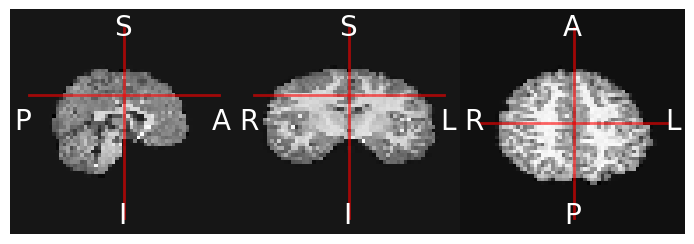

In [8]:
temp.plot_ortho(flat=True,xyz=coords)

In [9]:
sphere_small = temp.new_image_like(sphere(shape=brain_size, radius=2, position=coords)*1.0)
sphere_big = temp.new_image_like(sphere(shape=brain_size, radius=8, position=coords)*1.0)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



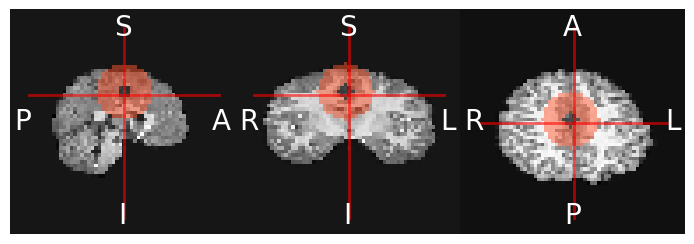

In [14]:
temp.plot_ortho(sphere_small*3+sphere_big*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5)

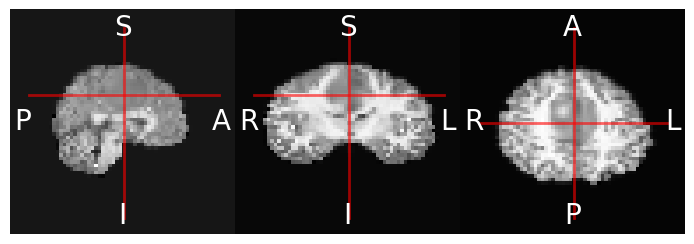

In [16]:
mytx = ants.registration(fixed=sphere_big, moving=sphere_small,mask=sphere_big,type_of_transform = 'SyNOnly' )
alteredBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0])
alteredBrain.plot_ortho(flat=True,xyz=coords)

In [18]:
ofn = '../../BC-sim/Altered_Brains/TD-sub-0001.nii.gz'
alteredBrain.to_file(ofn) #save it

# Make ADHD Altered Brain

In [20]:
temp = ants.image_read(ofn)
temp = ants.resample_image(image=temp,resample_params=brain_size,use_voxels=True,interp_type=1)
temp = temp.iMath_normalize()

In [21]:
coords = (32,32,32)

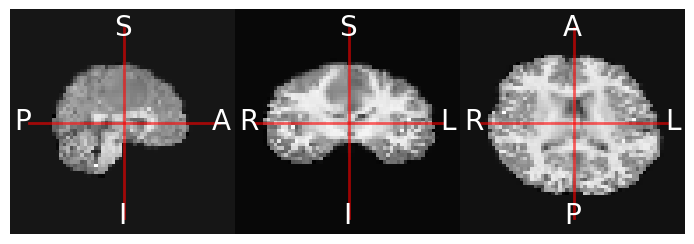

In [22]:
temp.plot_ortho(flat=True,xyz=coords)

In [23]:
sphere_small = temp.new_image_like(sphere(shape=brain_size, radius=2, position=coords)*1.0)
sphere_big = temp.new_image_like(sphere(shape=brain_size, radius=8, position=coords)*1.0)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



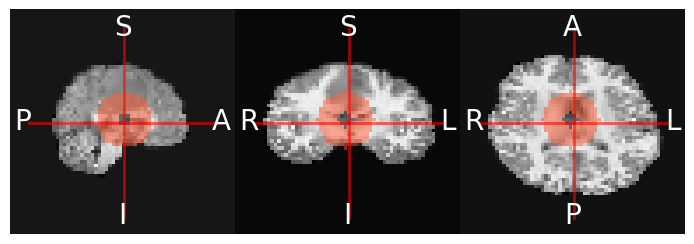

In [24]:
temp.plot_ortho(sphere_small*3+sphere_big*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5)

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



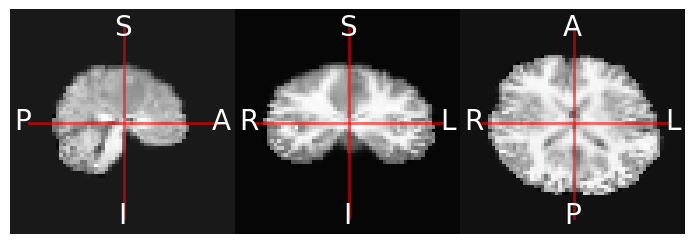

In [25]:
mytx = ants.registration(fixed=sphere_small, moving=sphere_big,mask=sphere_big,type_of_transform = 'SyNOnly' )
alteredBrain = ants.apply_transforms(fixed=temp, moving=temp,transformlist=mytx['fwdtransforms'][0])
alteredBrain.plot_ortho(flat=True,xyz=coords)

In [26]:
ofn = '../../BC-sim/Altered_Brains/ADHD-sub-0001.nii.gz'
alteredBrain.to_file(ofn) #save it

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



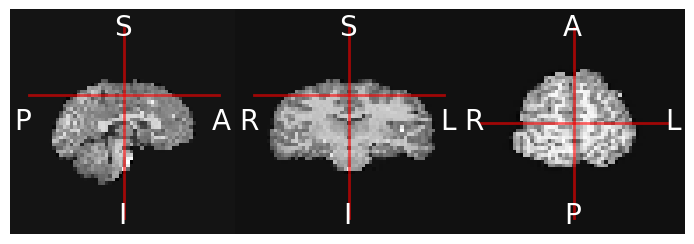

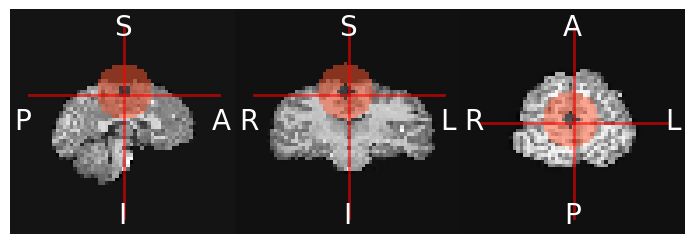

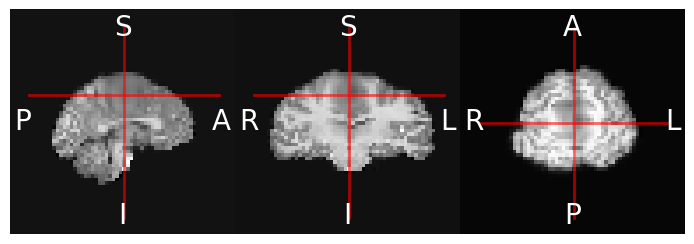

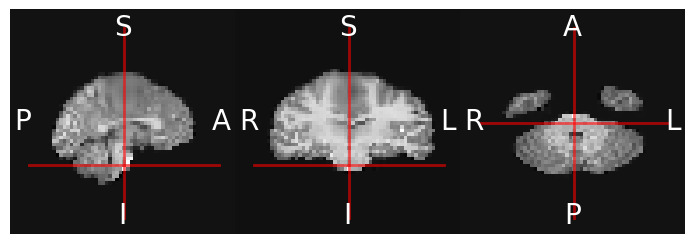

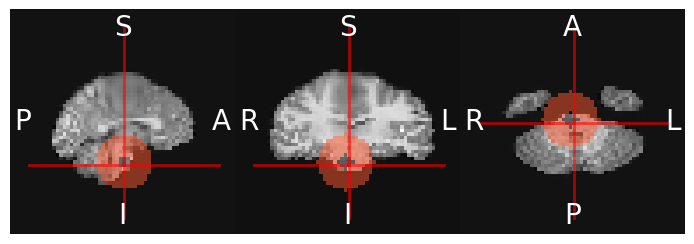

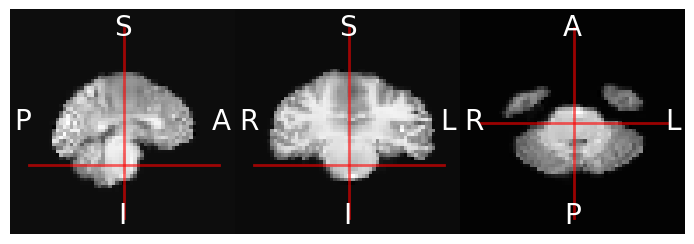

In [34]:
#this worked
#TD
s=2
tempTD = ants.image_read('../../BC-sim/sub-0010002_Extracted_Brain-Copy1.nii.gz')
tempTD = ants.resample_image(image=tempTD,resample_params=brain_size,use_voxels=True,interp_type=1)
tempTD = tempTD.iMath_normalize()
coords = (32,32,40) #varies
tempTD.plot_ortho(flat=True,xyz=coords)
sphere_move = tempTD.new_image_like(sphere(shape=brain_size, radius=2, position=coords)*1.0) # radii vary
sphere_fixed = tempTD.new_image_like(sphere(shape=brain_size, radius=8, position=coords)*1.0) #radii vary
tempTD.plot_ortho(sphere_move*3+sphere_fixed*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5)
mytx = ants.registration(fixed=sphere_fixed, moving=sphere_move,mask=sphere_fixed,type_of_transform = 'SyNOnly' )
alteredBrain = ants.apply_transforms(fixed=tempTD, moving=tempTD,transformlist=mytx['fwdtransforms'][0])
alteredBrain.plot_ortho(flat=True,xyz=coords)
ofn = f'../../BC-sim/Altered_Brains/TD-sub-{s}.nii.gz'
alteredBrain.to_file(ofn) #save it

#ADHD
tempADHD = ants.image_read(ofn)
tempADHD = ants.resample_image(image=tempADHD,resample_params=brain_size,use_voxels=True,interp_type=1)
tempADHD = tempADHD.iMath_normalize()
coords = (32,32,20) #varies
tempADHD.plot_ortho(flat=True,xyz=coords)
sphere_move = tempADHD.new_image_like(sphere(shape=brain_size, radius=2, position=coords)*1.0) # radii vary
sphere_fixed = tempADHD.new_image_like(sphere(shape=brain_size, radius=8, position=coords)*1.0) #radii vary
tempADHD.plot_ortho(sphere_move*3+sphere_fixed*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5)
mytx = ants.registration(fixed=sphere_fixed, moving=sphere_move,mask=sphere_fixed,type_of_transform = 'SyNOnly' )
alteredBrain = ants.apply_transforms(fixed=tempADHD, moving=tempADHD,transformlist=mytx['fwdtransforms'][0])
alteredBrain.plot_ortho(flat=True,xyz=coords)
ofn = f'../../BC-sim/Altered_Brains/ADHD-sub-{s}.nii.gz'
alteredBrain.to_file(ofn) #save it

In [38]:
# the only success I have to my name


def alterBrain(file, coordsTD, coordsADHD, sz1, sz2, sz3, sz4, s):
#sz1 and sz3 moves, sz2 and sz4 fixed
#TD
    tempTD = ants.image_read(file)
    tempTD = ants.resample_image(image=tempTD,resample_params=brain_size,use_voxels=True,interp_type=1)
    tempTD = tempTD.iMath_normalize()
    coords = coordsTD #varies
    sphere_move = tempTD.new_image_like(sphere(shape=brain_size, radius=sz1, position=coords)*1.0) # radii vary
    sphere_fixed = tempTD.new_image_like(sphere(shape=brain_size, radius=sz2, position=coords)*1.0) #radii vary
    tempTD.plot_ortho(sphere_move*3+sphere_fixed*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5, title='Target')
    mytx = ants.registration(fixed=sphere_fixed, moving=sphere_move,mask=sphere_fixed,type_of_transform = 'SyNOnly' )
    alteredBrain = ants.apply_transforms(fixed=tempTD, moving=tempTD,transformlist=mytx['fwdtransforms'][0])
    alteredBrain.plot_ortho(flat=True,xyz=coords, title='TD Altered Brain')
    ofn = f'../../BC-sim/Altered_Brains/TD-sub-{s}.nii.gz'
    alteredBrain.to_file(ofn) #save it
#ADHD
    tempADHD = ants.image_read(ofn)
    tempADHD = ants.resample_image(image=tempADHD,resample_params=brain_size,use_voxels=True,interp_type=1)
    tempADHD = tempADHD.iMath_normalize()
    coords = coordsADHD #varies
    sphere_move = tempADHD.new_image_like(sphere(shape=brain_size, radius=sz3, position=coords)*1.0) # radii vary
    sphere_fixed = tempADHD.new_image_like(sphere(shape=brain_size, radius=sz4, position=coords)*1.0) #radii vary
    tempADHD.plot_ortho(sphere_move*3+sphere_fixed*7,overlay_cmap='flag',xyz=coords,flat=True,overlay_alpha=.5, title='Target')
    mytx = ants.registration(fixed=sphere_fixed, moving=sphere_move,mask=sphere_fixed,type_of_transform = 'SyNOnly' )
    alteredBrain = ants.apply_transforms(fixed=tempADHD, moving=tempADHD,transformlist=mytx['fwdtransforms'][0])
    alteredBrain.plot_ortho(flat=True,xyz=coords, title='ADHD Altered Brain')
    ofn = f'../../BC-sim/Altered_Brains/ADHD-sub-{s}.nii.gz'
    alteredBrain.to_file(ofn) #save it


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



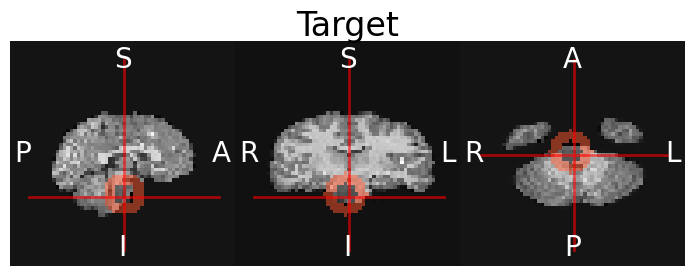

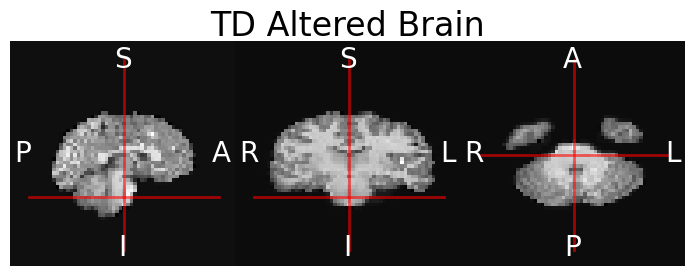

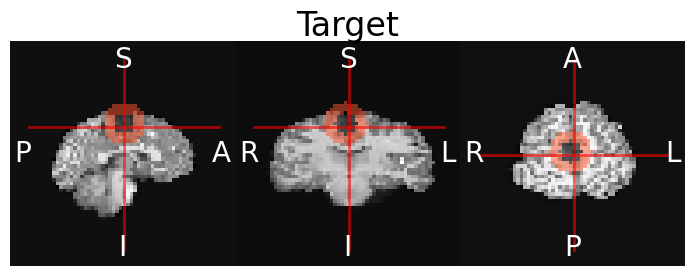

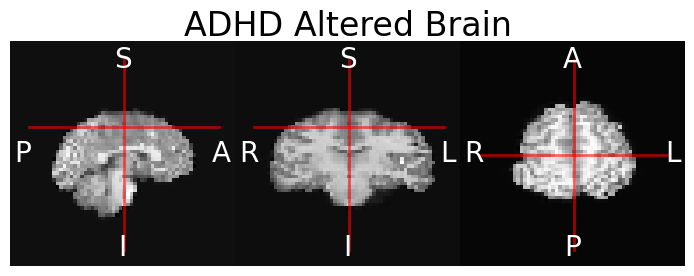

In [39]:
#yeehaw
alterBrain(file='../../BC-sim/sub-0010002_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,20), coordsADHD=(32,32,40), sz1=3, sz2=6, sz3=3, sz4=6, s=2)

# Global TD expansion with frontal lobe ADHD expansion

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



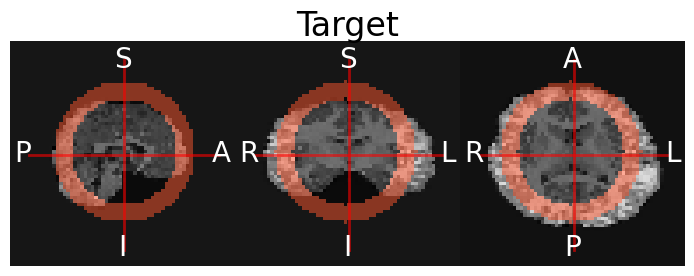

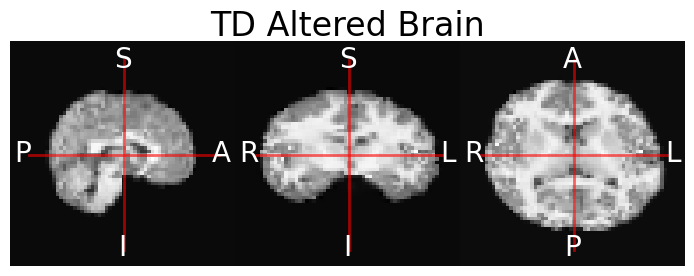

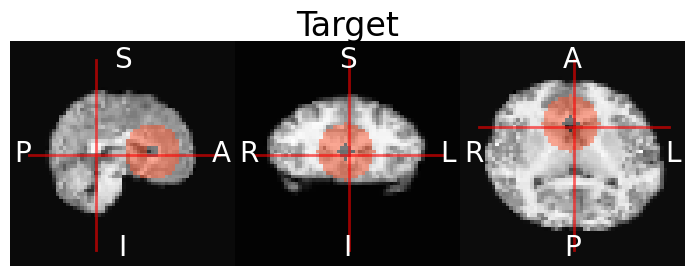

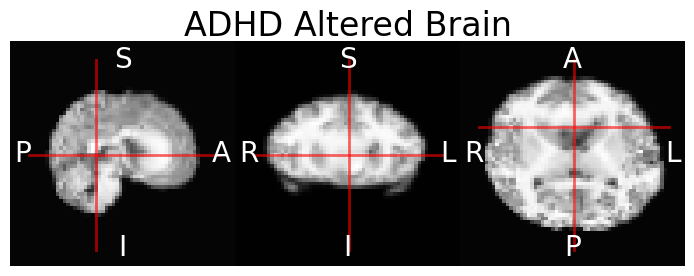

In [41]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010001_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=20, sz3=2, sz4=8, s=1)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



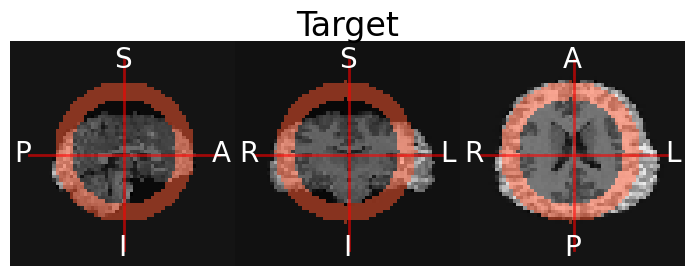

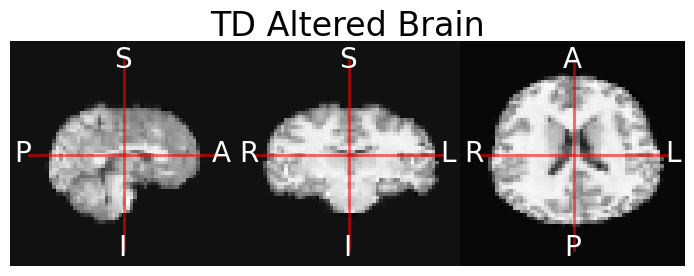

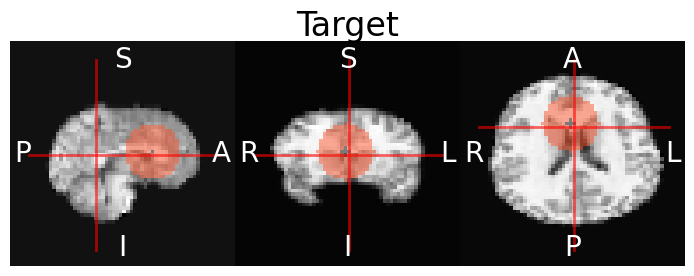

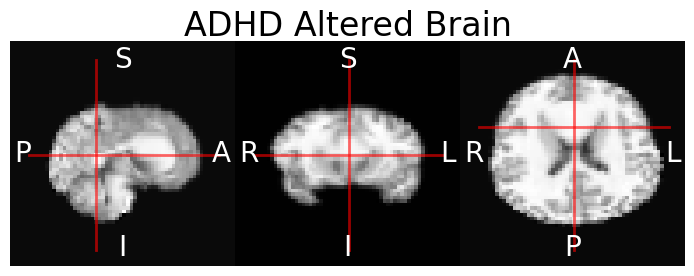

In [42]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010002_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=20, sz3=1, sz4=8, s=2)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



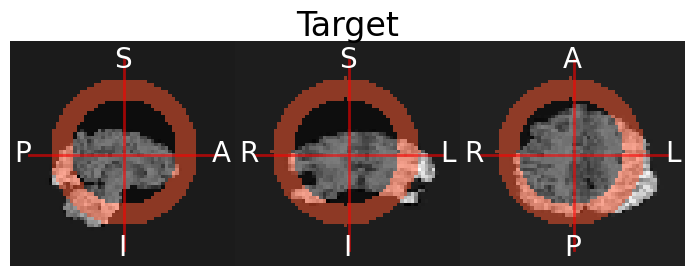

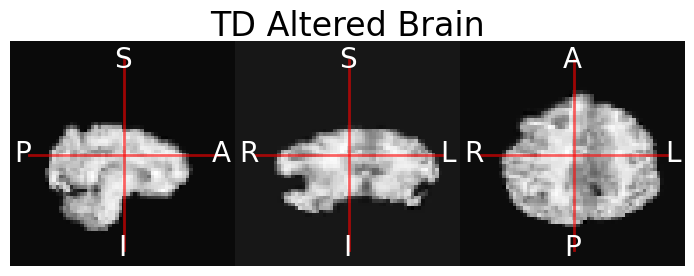

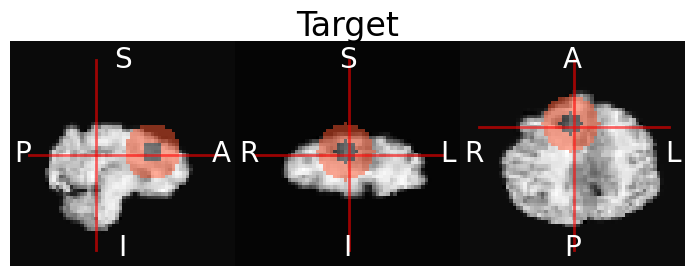

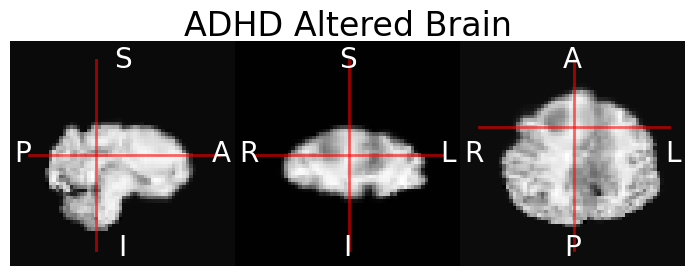

In [43]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010003_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=21, sz3=3, sz4=8, s=3)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



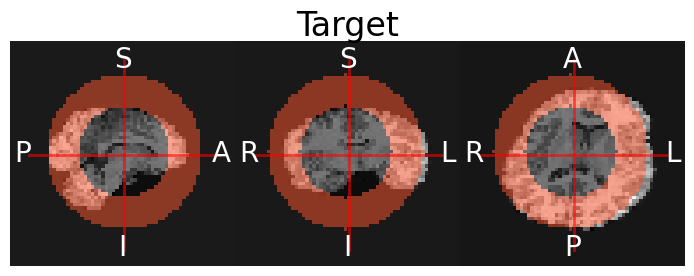

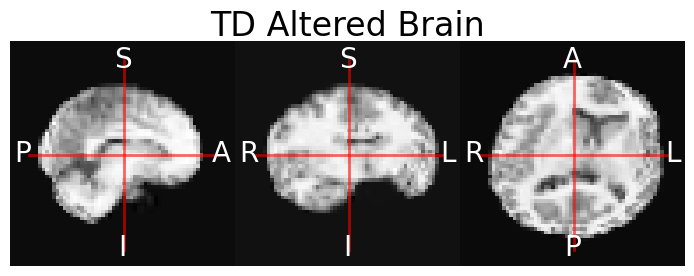

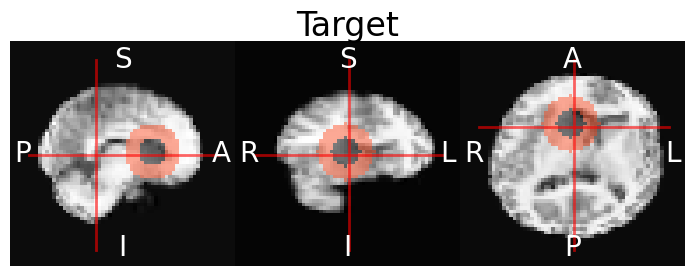

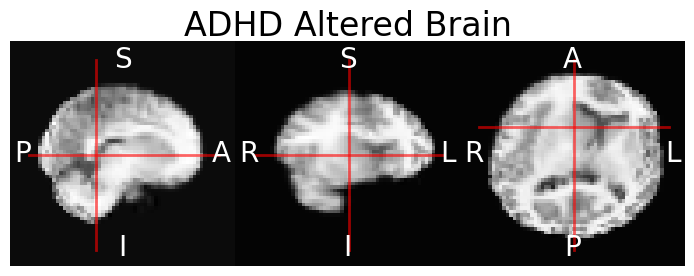

In [44]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010004_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=13, sz2=22, sz3=4, sz4=8, s=4)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



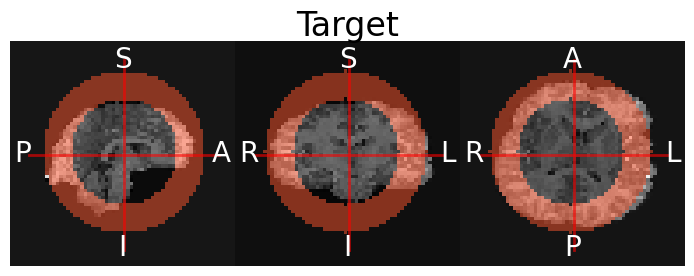

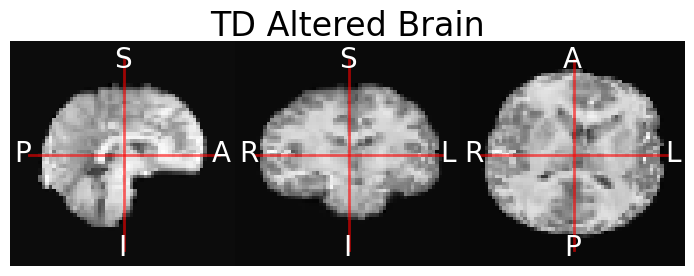

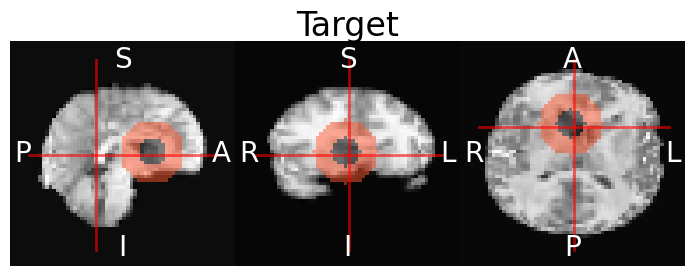

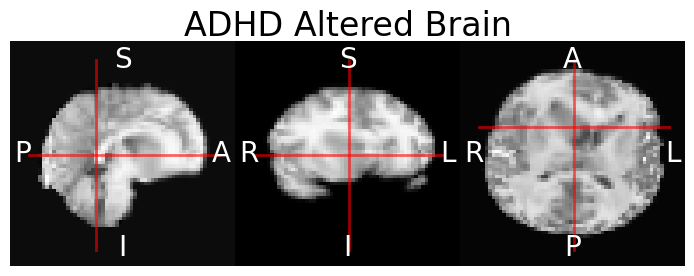

In [45]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010005_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=23, sz3=4, sz4=9, s=5)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



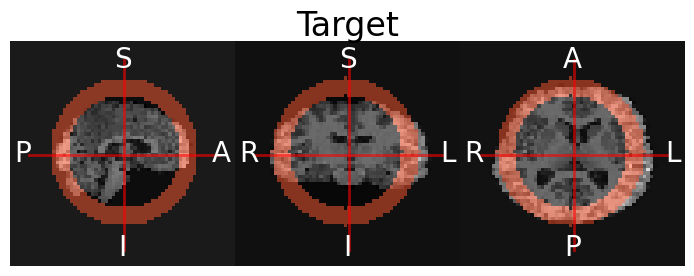

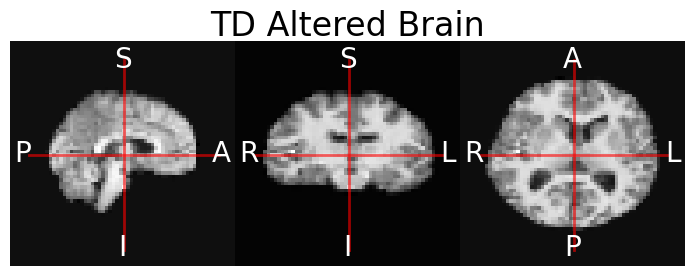

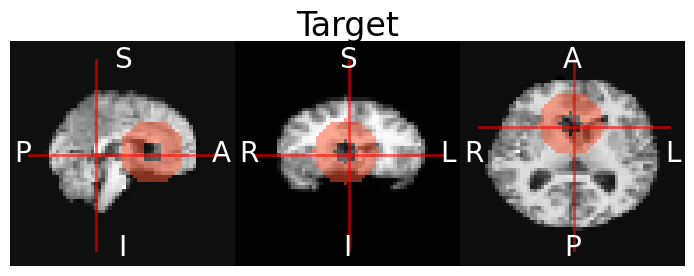

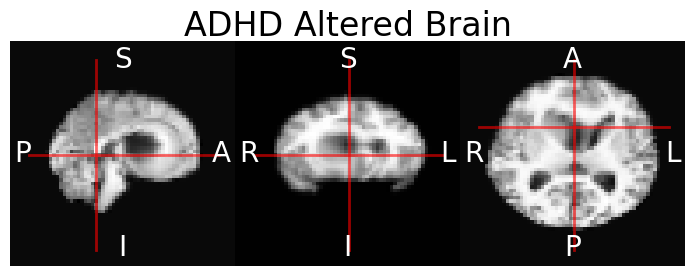

In [46]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010006_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=16, sz2=21, sz3=3, sz4=9, s=6)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



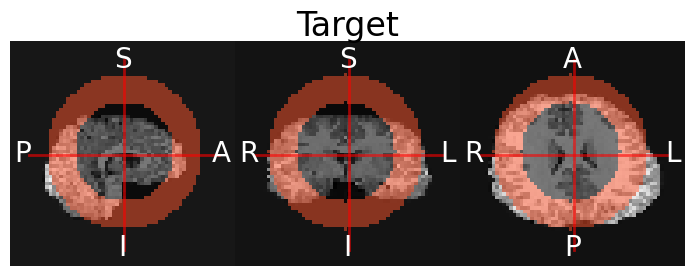

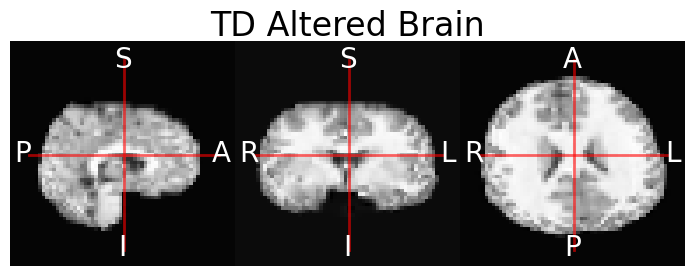

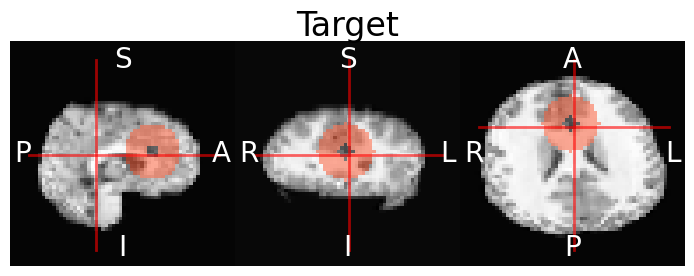

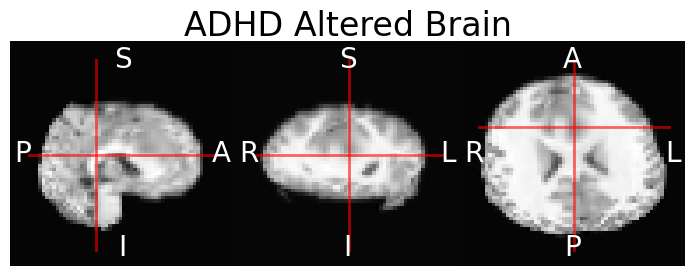

In [47]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010007_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=14, sz2=22, sz3=2, sz4=8, s=7)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



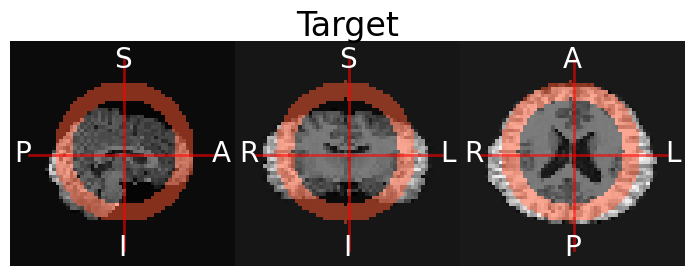

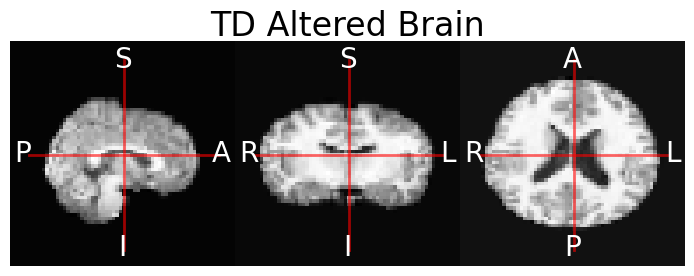

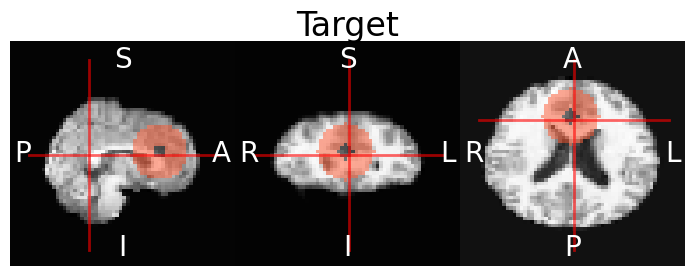

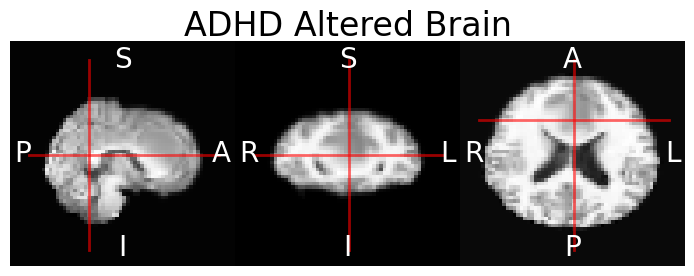

In [48]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010008_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=20, sz3=2, sz4=8, s=8)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



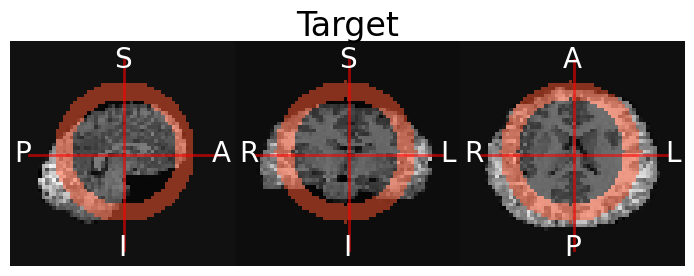

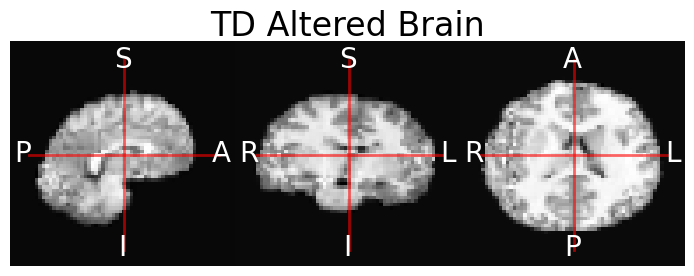

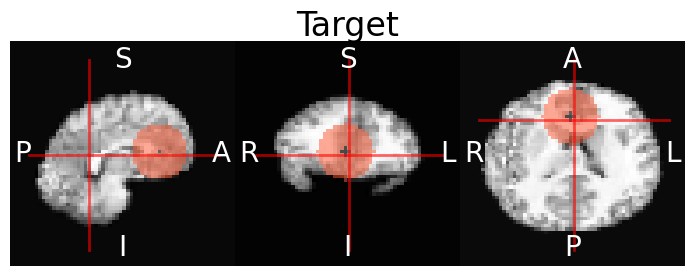

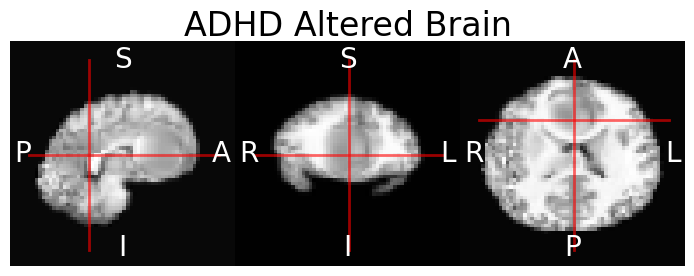

In [49]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010009_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=20, sz3=1, sz4=8, s=9)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



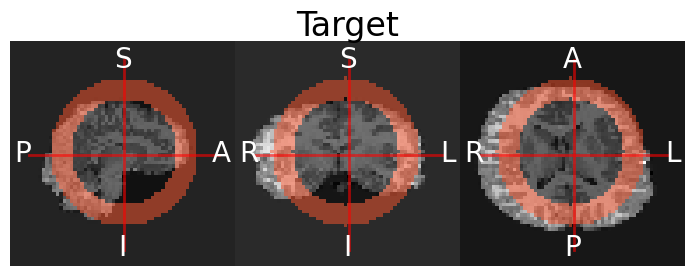

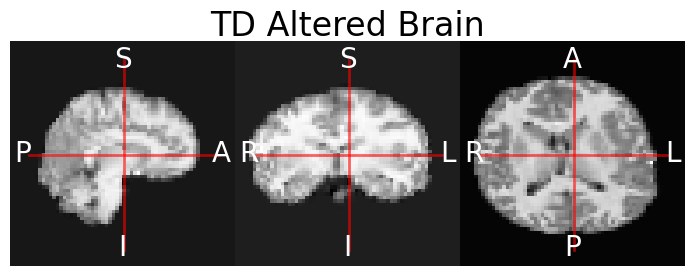

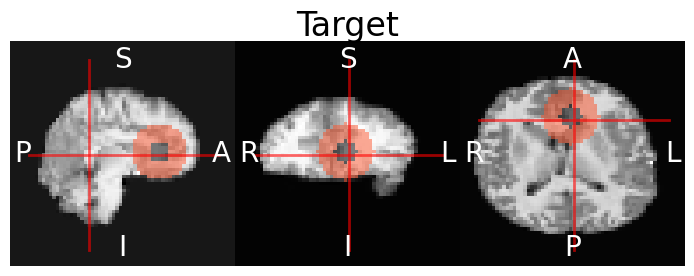

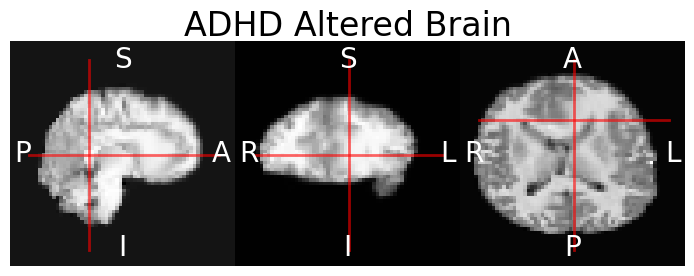

In [50]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010010_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=21, sz3=3, sz4=8, s=10)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



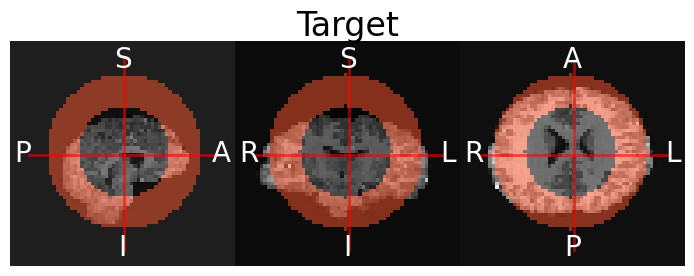

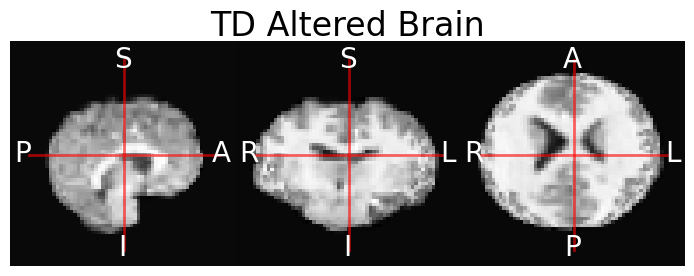

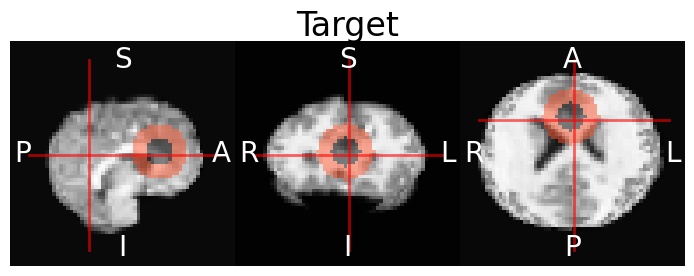

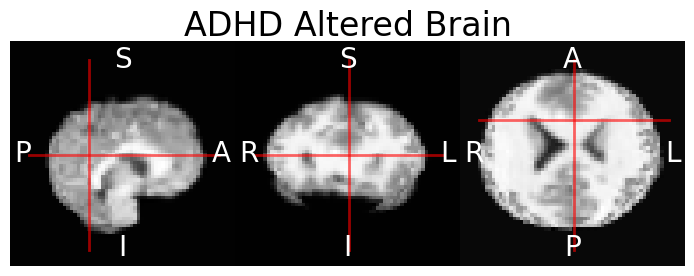

In [51]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010011_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=13, sz2=22, sz3=4, sz4=8, s=11)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



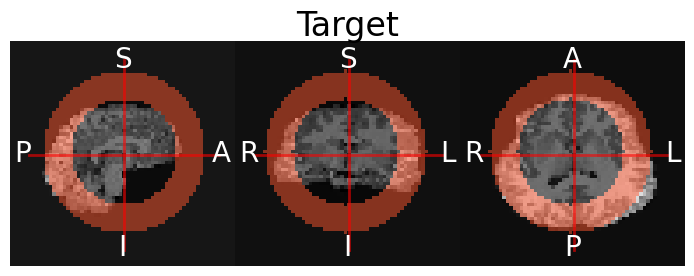

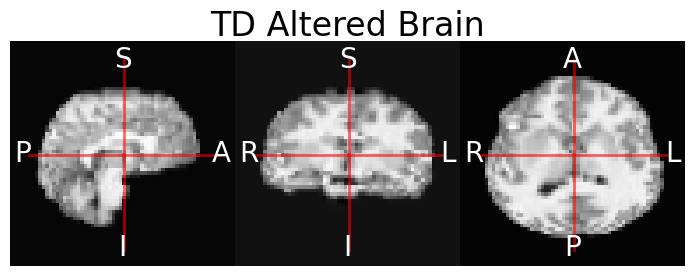

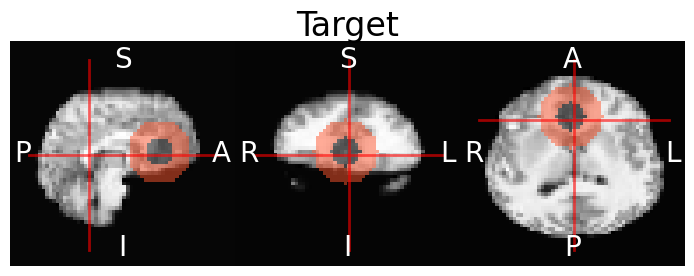

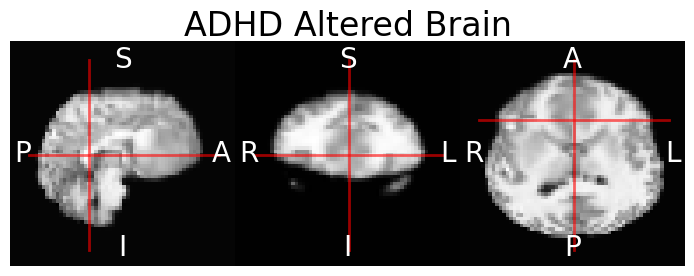

In [52]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010012_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=23, sz3=4, sz4=9, s=12)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



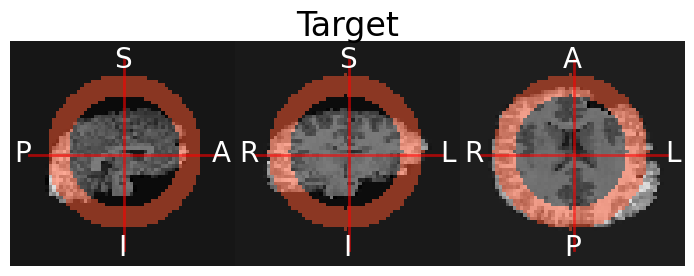

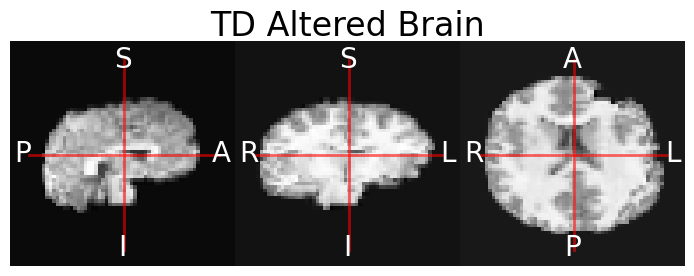

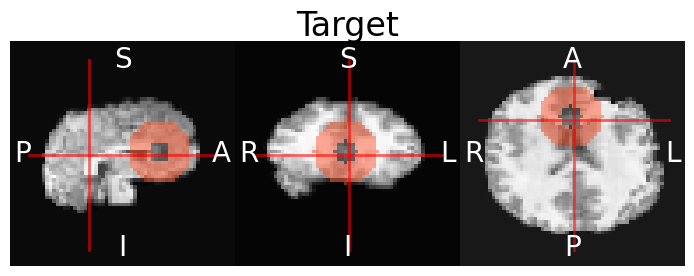

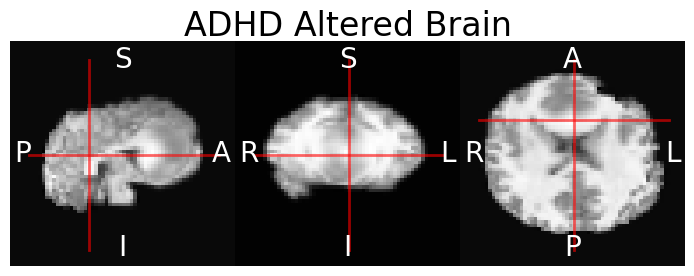

In [54]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010013_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=16, sz2=22, sz3=3, sz4=9, s=13)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



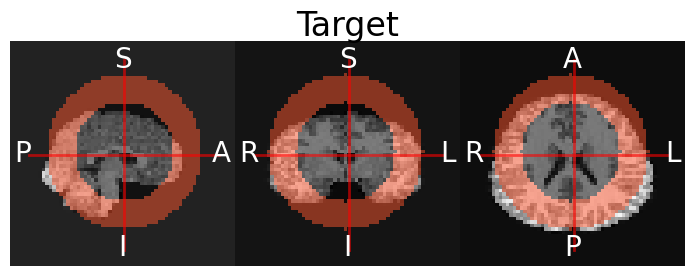

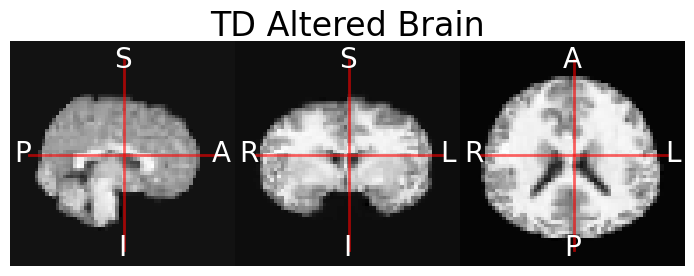

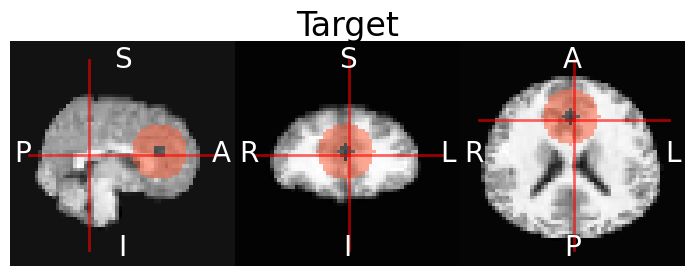

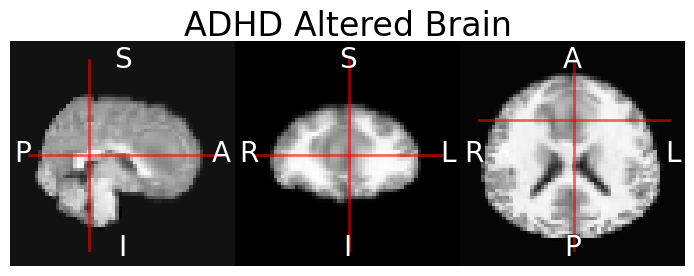

In [55]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010014_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=14, sz2=22, sz3=2, sz4=8, s=14)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



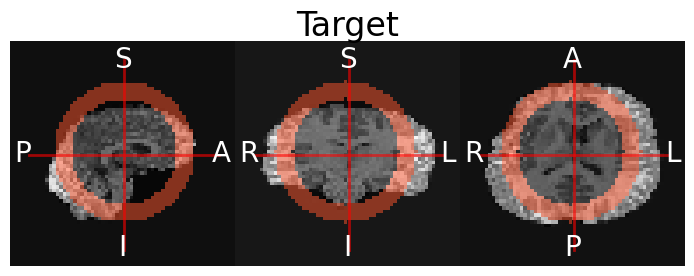

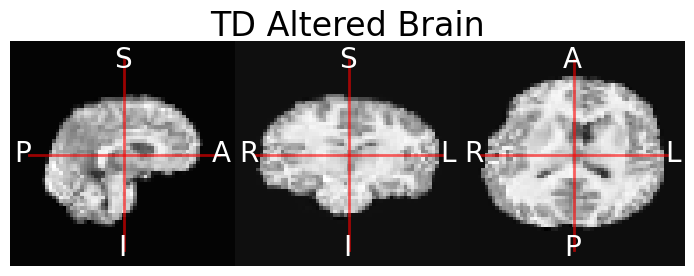

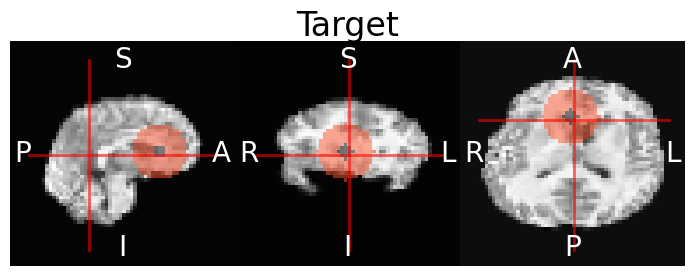

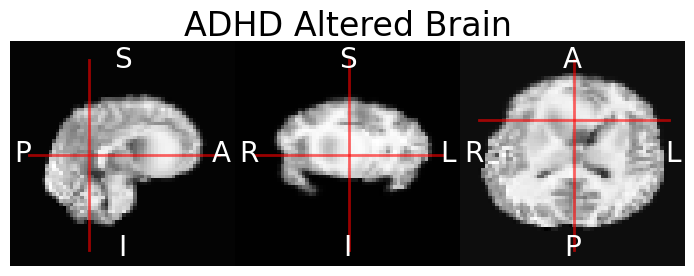

In [56]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010015_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=20, sz3=2, sz4=8, s=15)


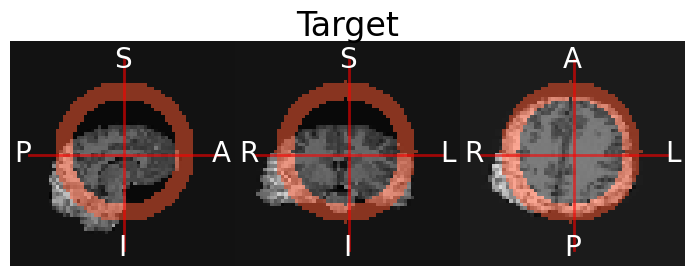

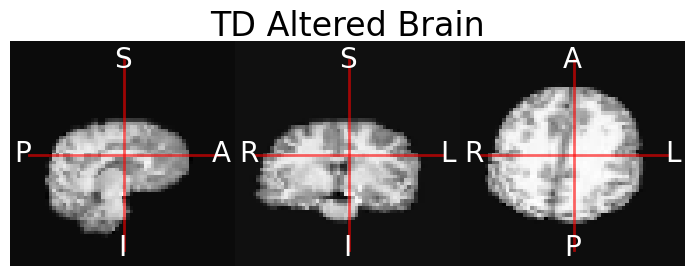

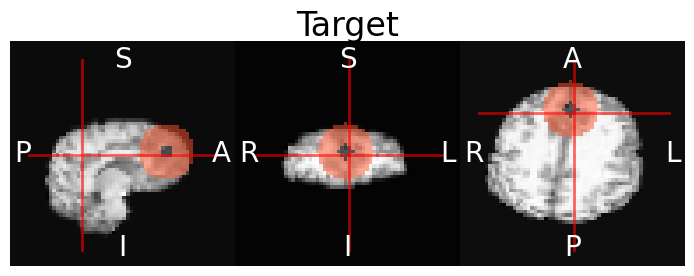

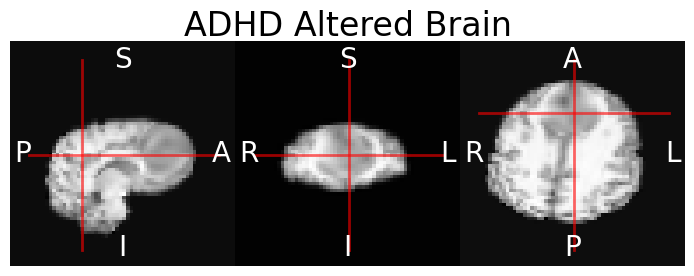

In [58]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010017_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=17)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



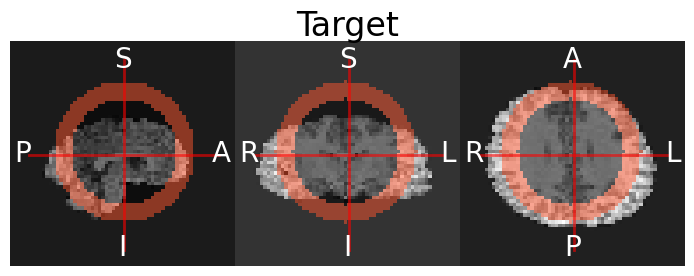

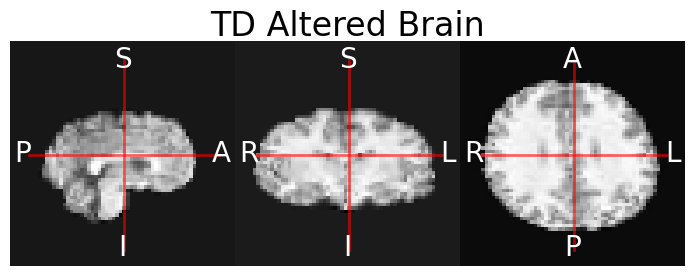

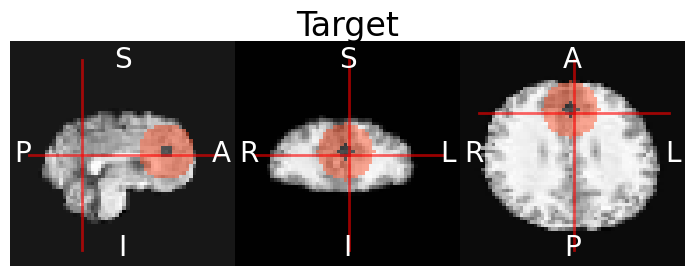

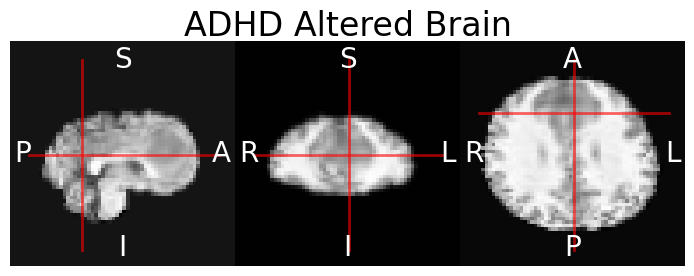

In [59]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010018_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=18)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



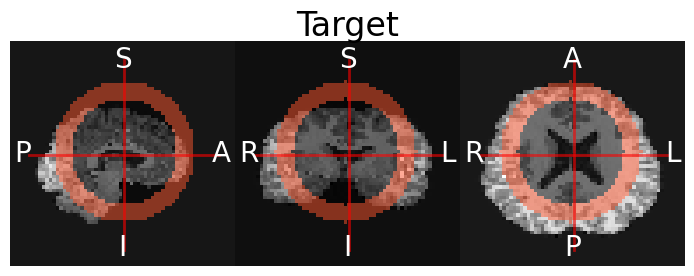

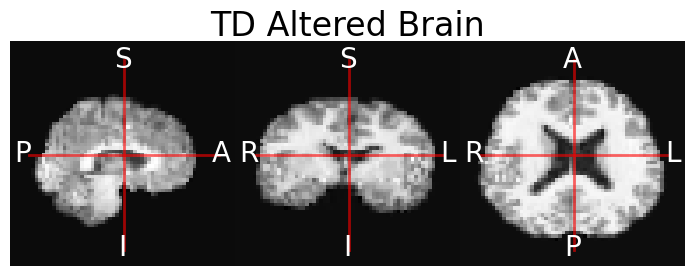

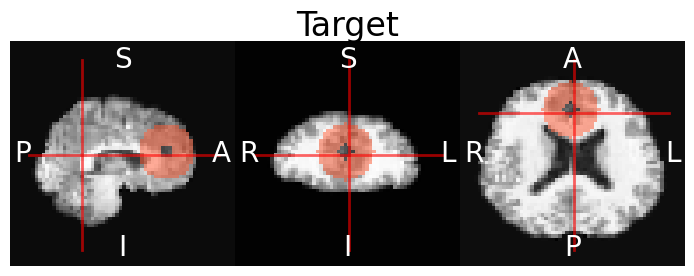

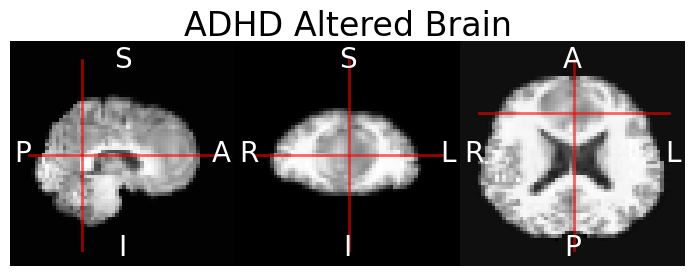

In [60]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010019_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=19)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



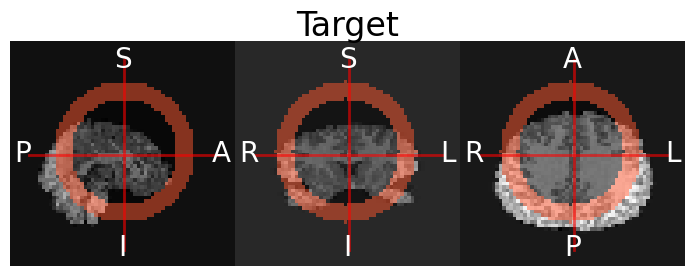

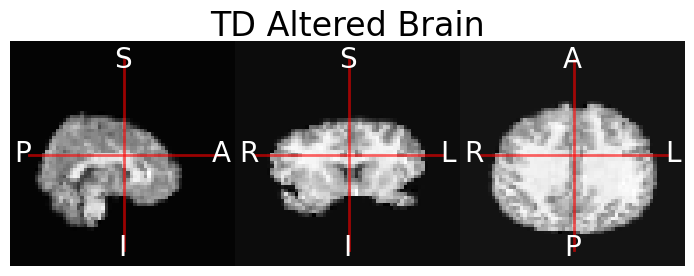

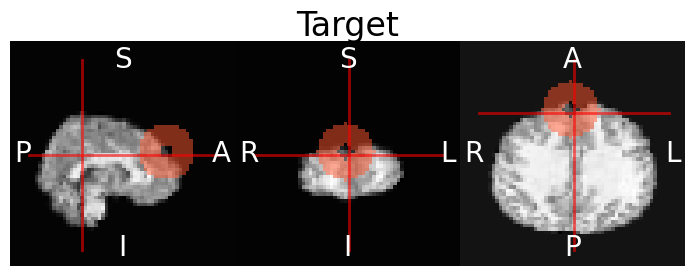

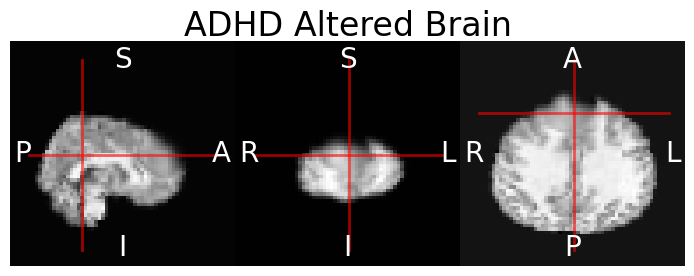

In [61]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010020_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=20)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



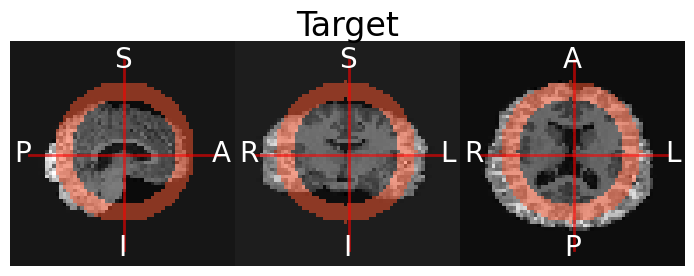

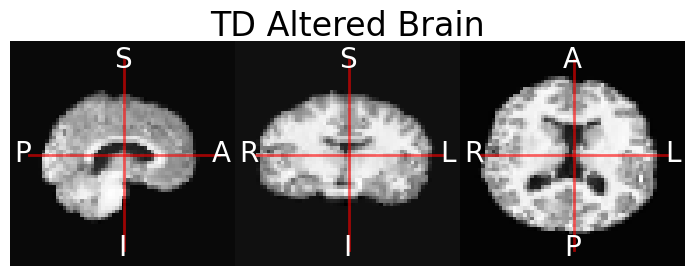

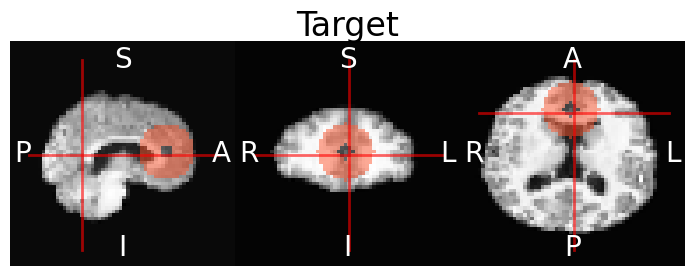

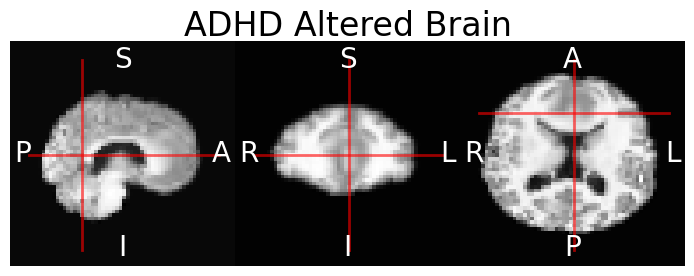

In [62]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010021_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=21)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



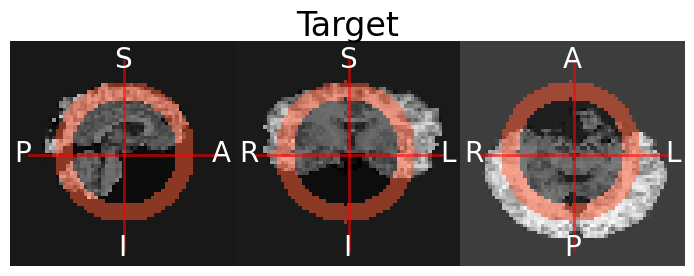

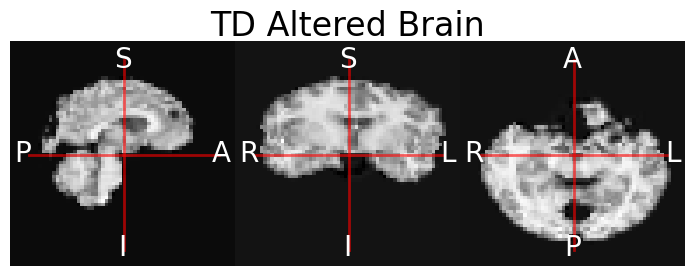

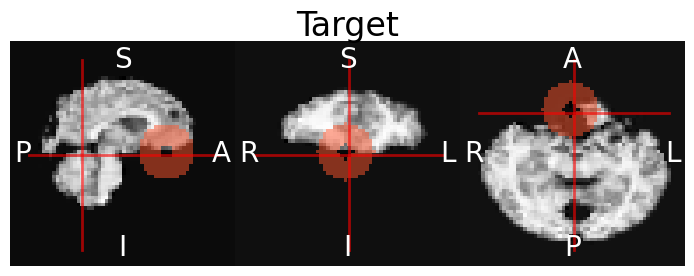

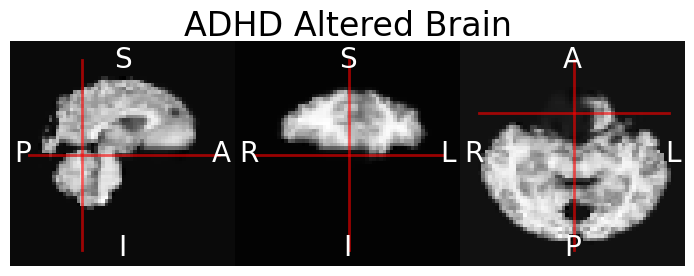

In [63]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010022_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=22)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



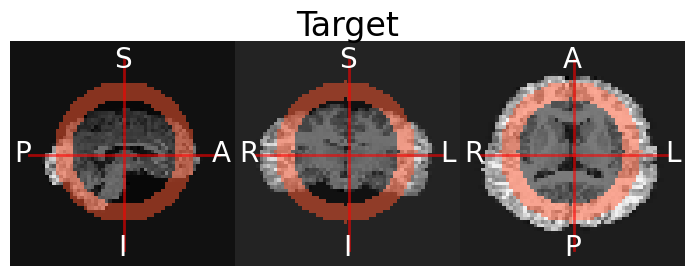

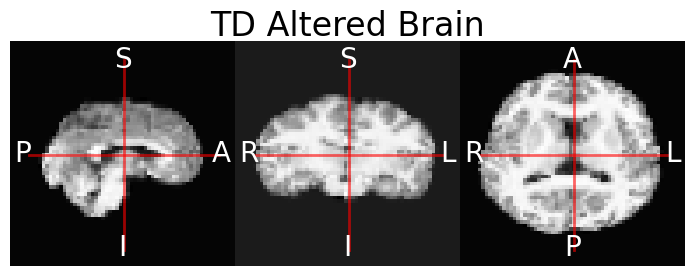

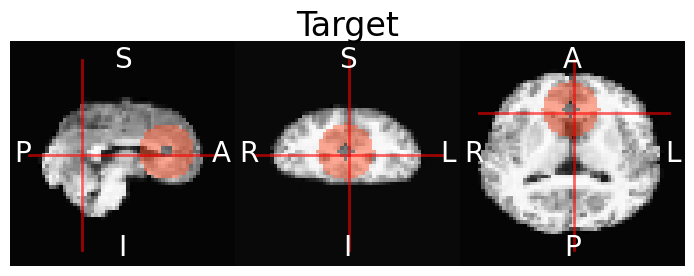

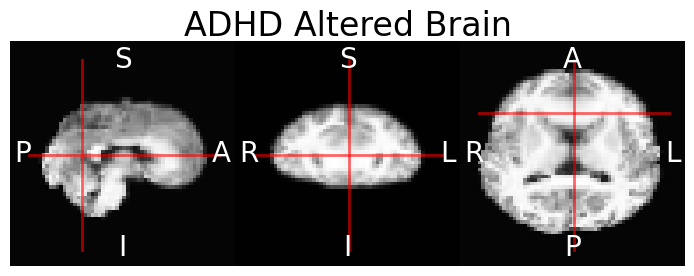

In [64]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010023_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=2, sz4=8, s=23)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



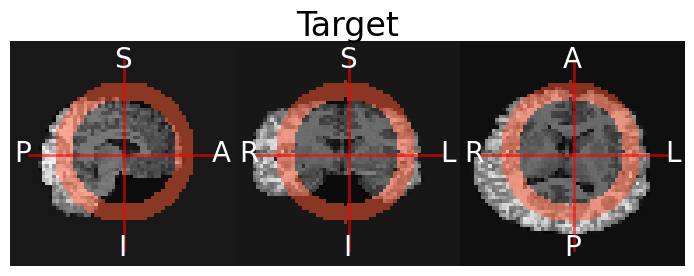

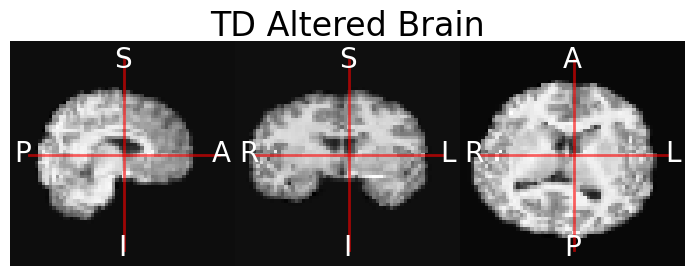

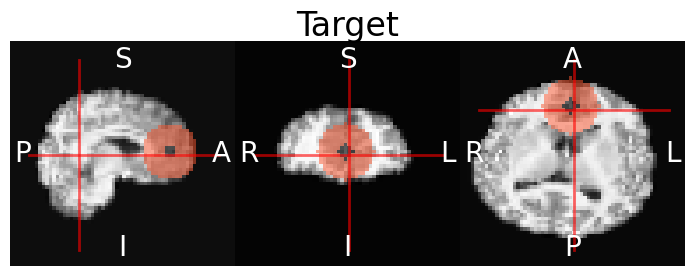

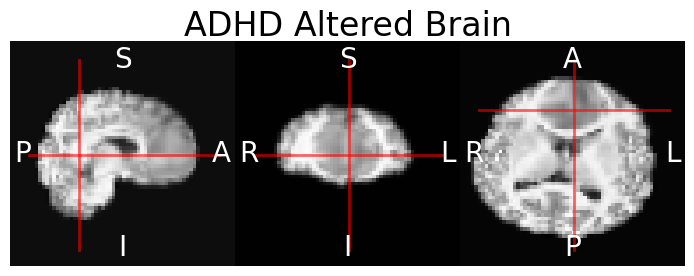

In [65]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010024_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,45,32), sz1=15, sz2=20, sz3=2, sz4=8, s=24)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



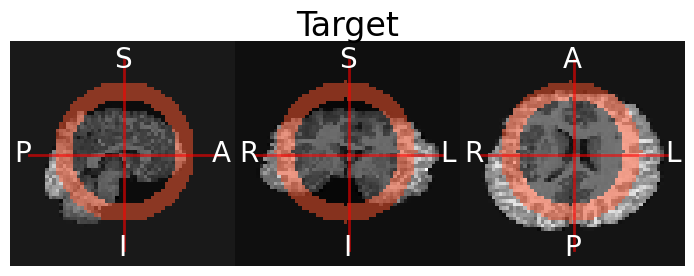

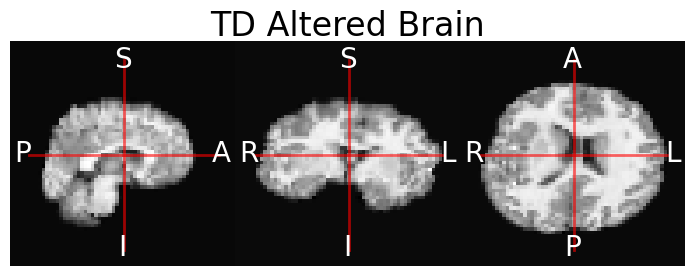

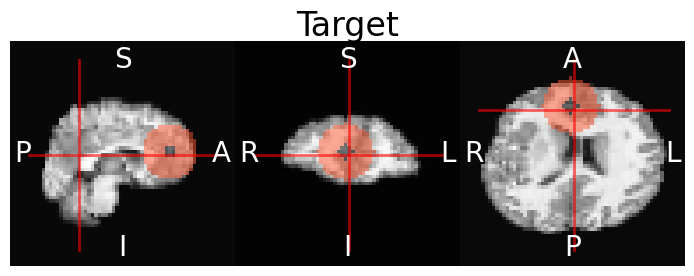

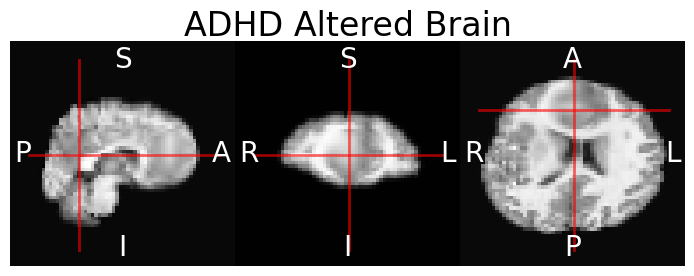

In [66]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010025_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,45,32), sz1=15, sz2=20, sz3=2, sz4=8, s=25)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



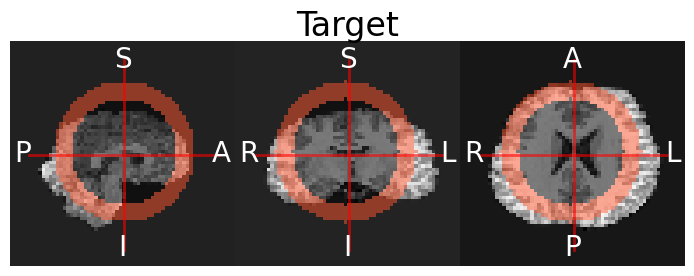

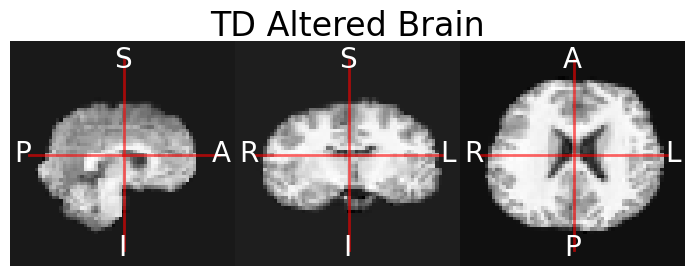

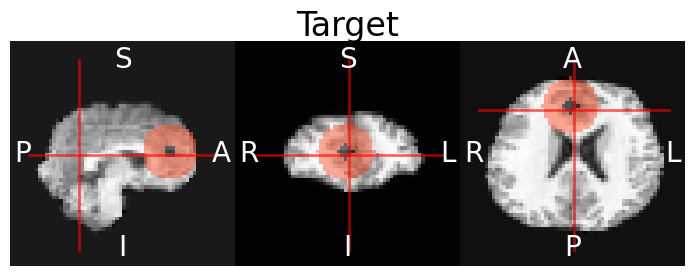

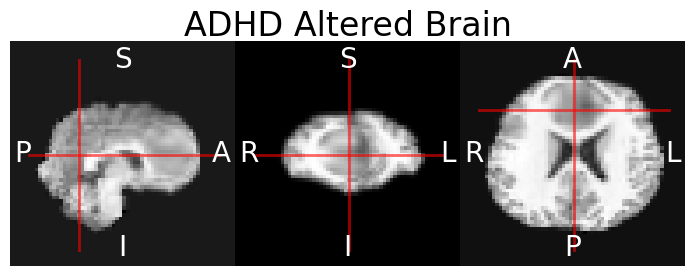

In [67]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010026_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,45,32), sz1=15, sz2=20, sz3=2, sz4=8, s=26)


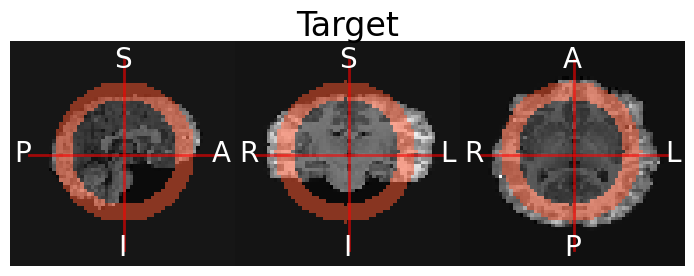

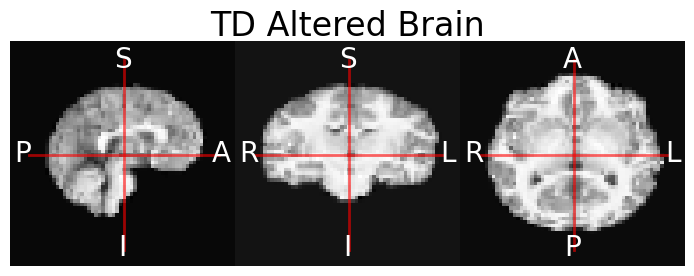

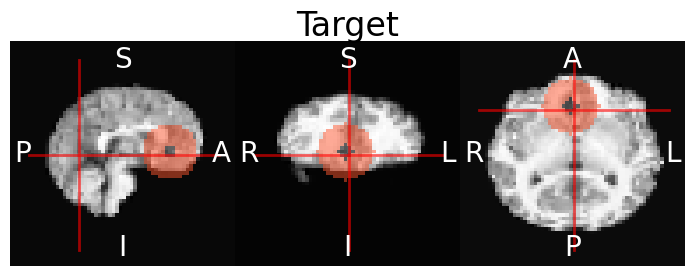

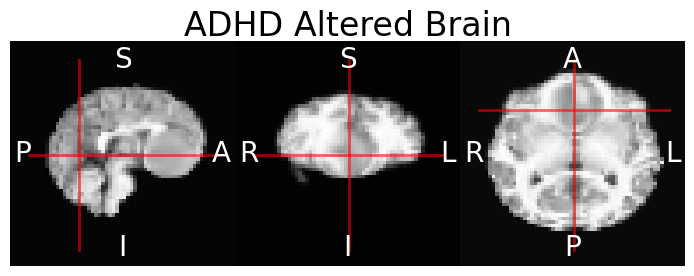

In [69]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010028_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,45,32), sz1=15, sz2=20, sz3=2, sz4=8, s=28)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



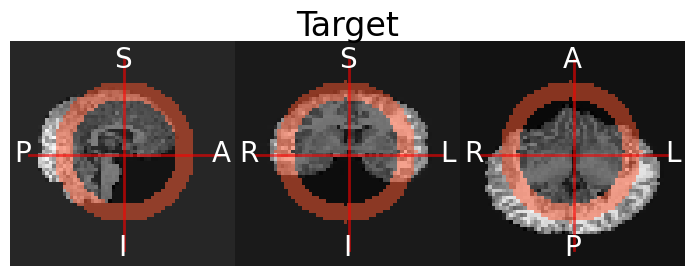

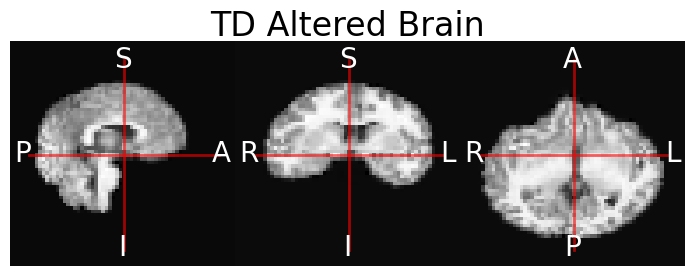

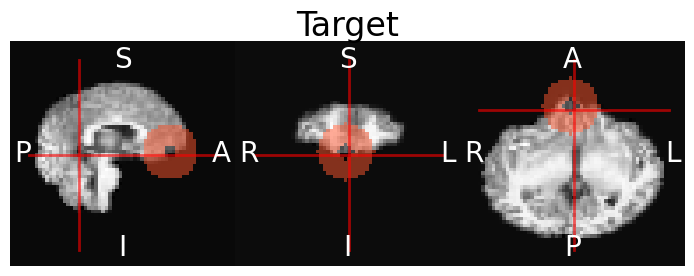

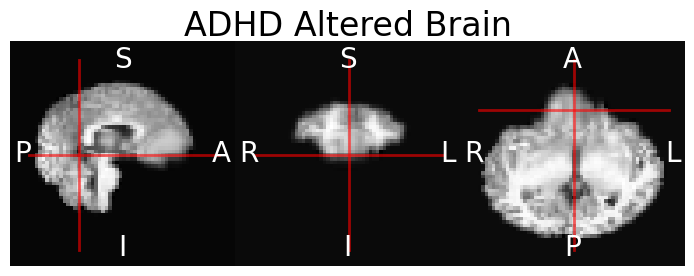

In [70]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010029_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,45,32), sz1=15, sz2=20, sz3=2, sz4=8, s=29)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



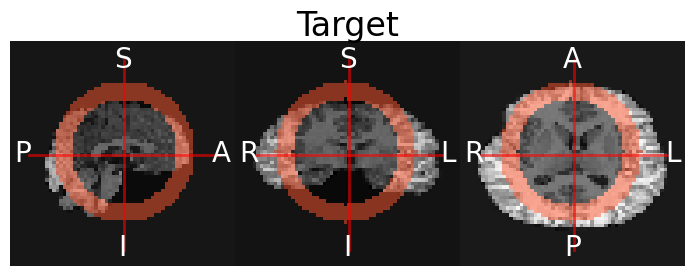

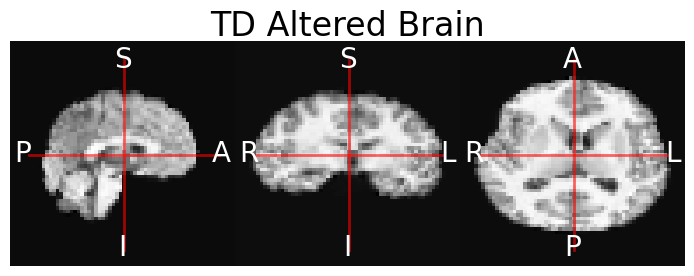

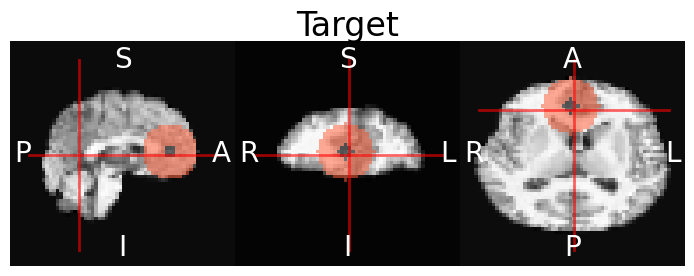

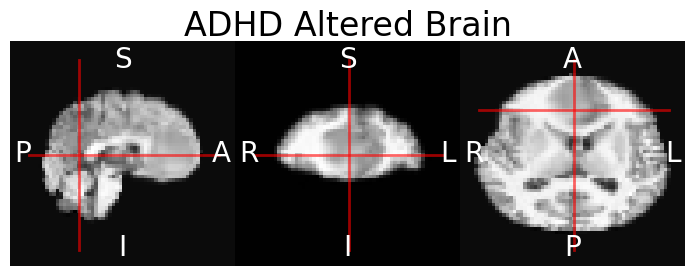

In [71]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010030_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,45,32), sz1=15, sz2=20, sz3=2, sz4=8, s=30)


# Global TD expansion with frontal lobe ADHD compression

/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



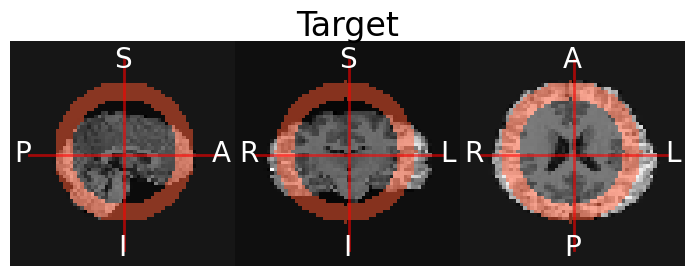

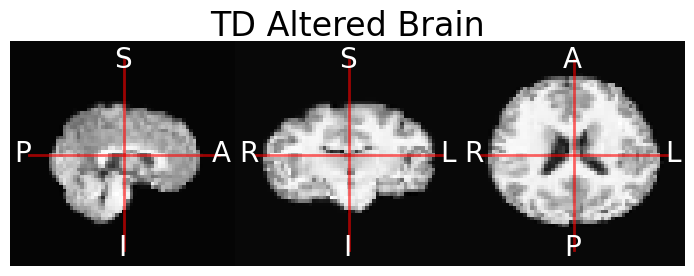

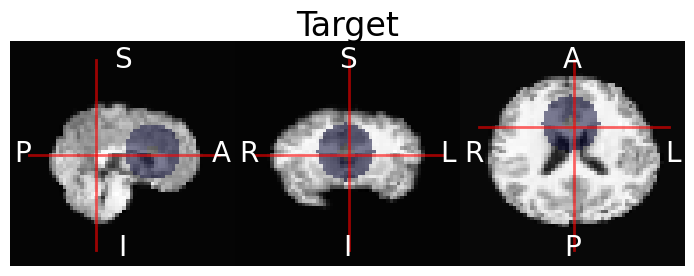

IndexError: list index out of range

In [72]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010031_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=20, sz3=8, sz4=2, s=31)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010032_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=20, sz3=8, sz4=1, s=32)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010033_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=21, sz3=8, sz4=3, s=33)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010034_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=13, sz2=22, sz3=8, sz4=4, s=34)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



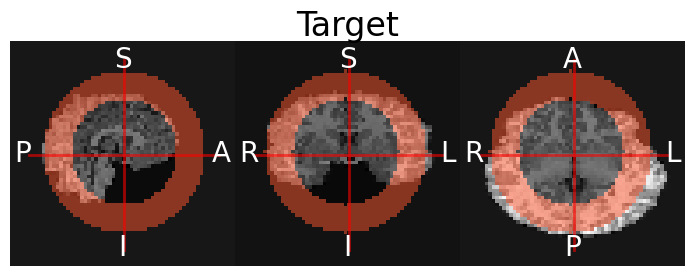

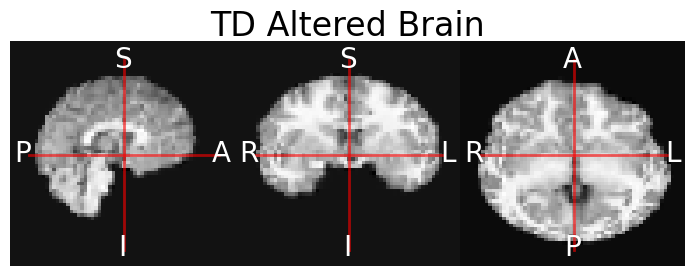

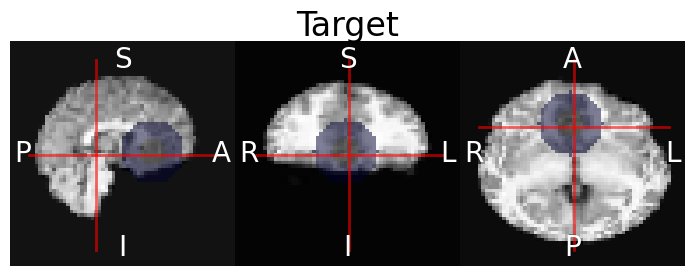

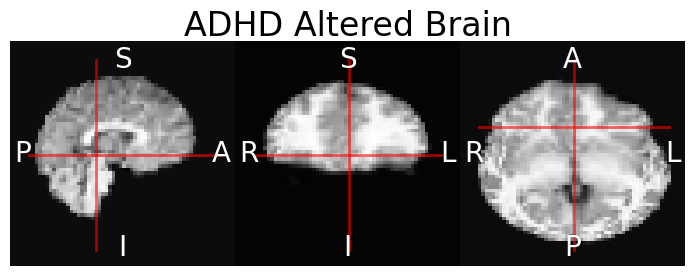

In [73]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010035_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=15, sz2=23, sz3=9, sz4=4, s=35)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



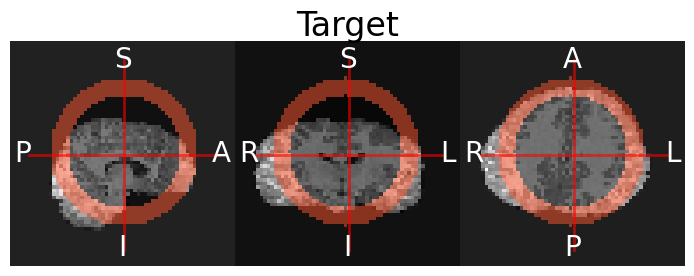

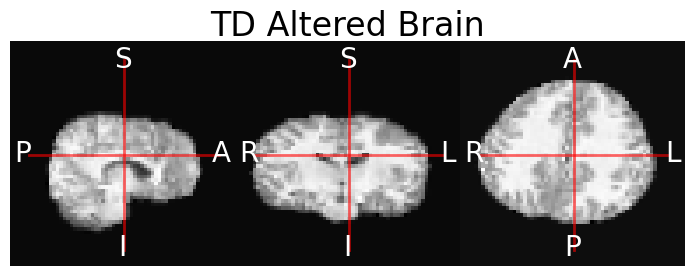

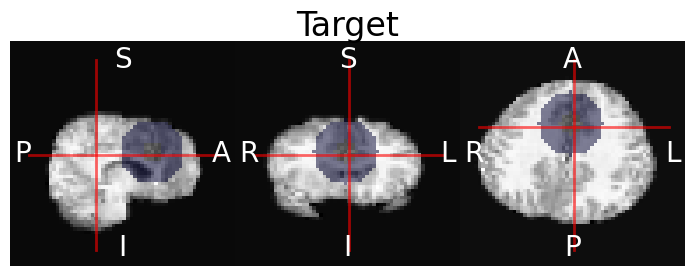

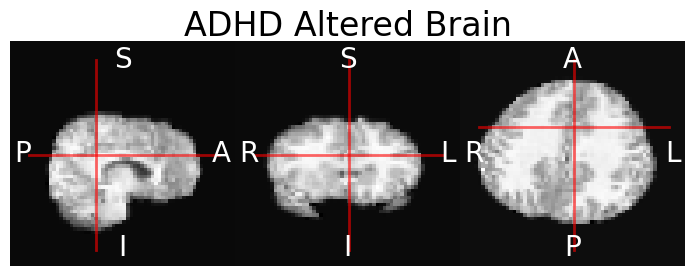

In [74]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010036_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=16, sz2=21, sz3=9, sz4=3, s=36)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



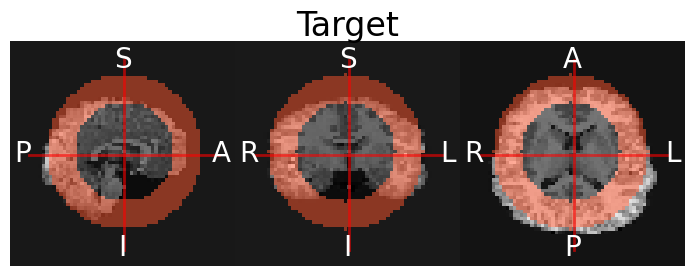

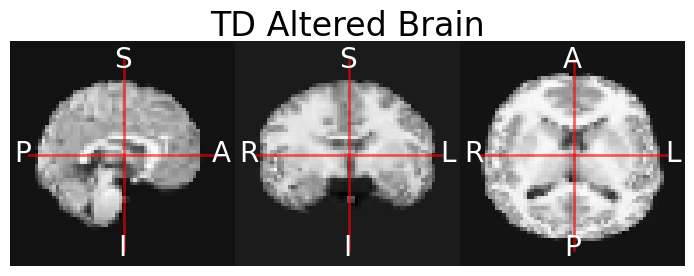

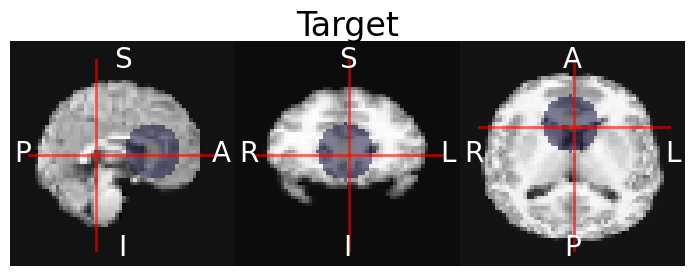

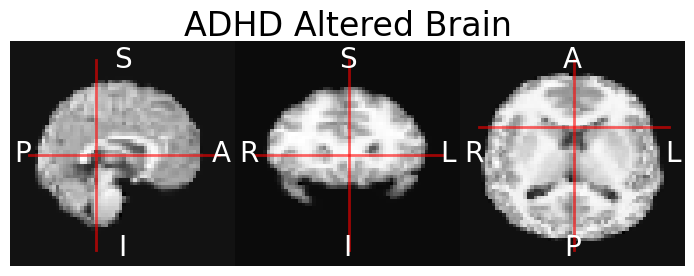

In [76]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010037_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,40,32), sz1=14, sz2=22, sz3=8, sz4=3, s=37)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



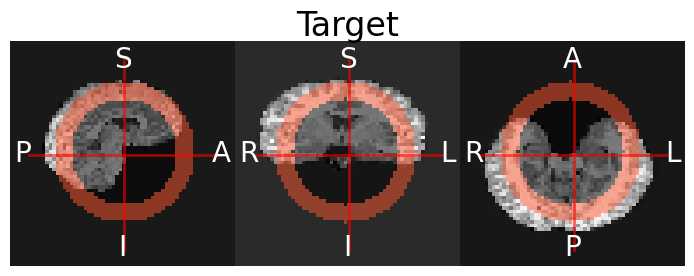

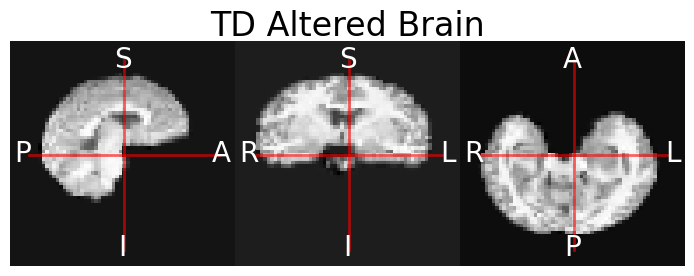

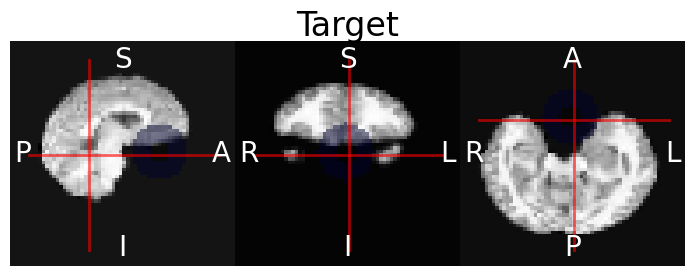

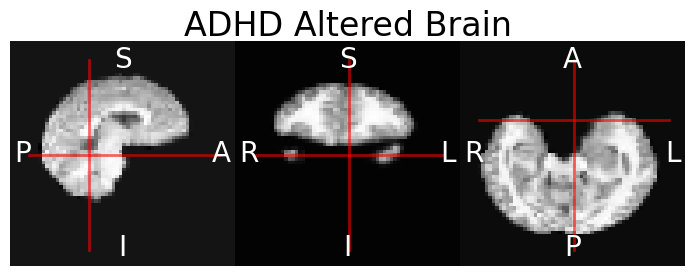

In [78]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010038_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=20, sz3=8, sz4=3, s=38)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



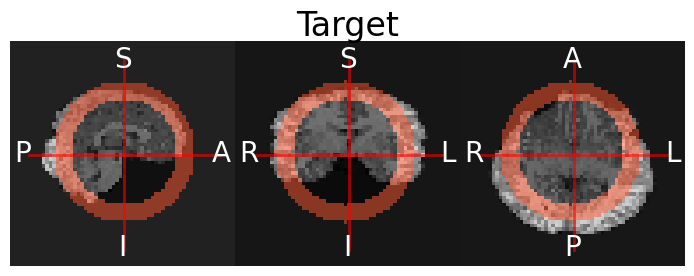

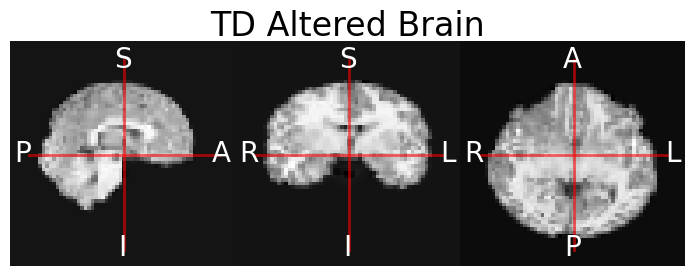

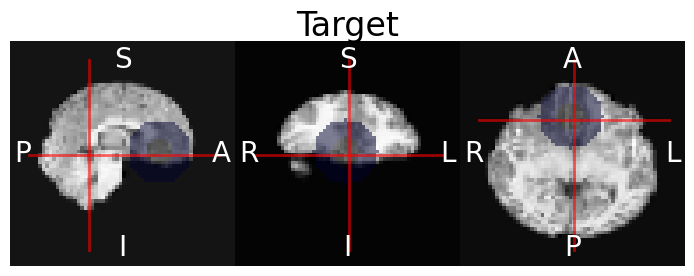

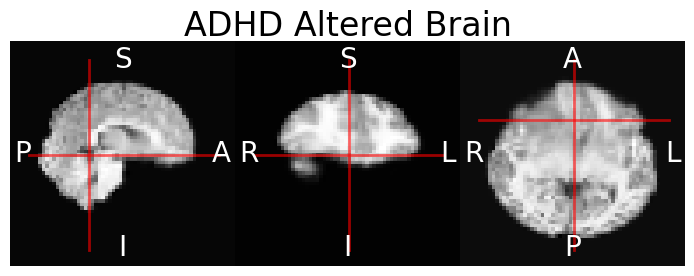

In [81]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010039_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=20, sz3=9, sz4=4, s=39)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



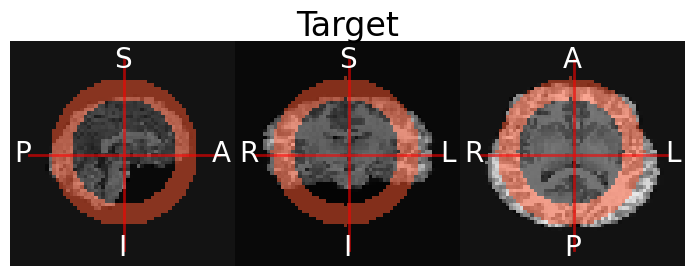

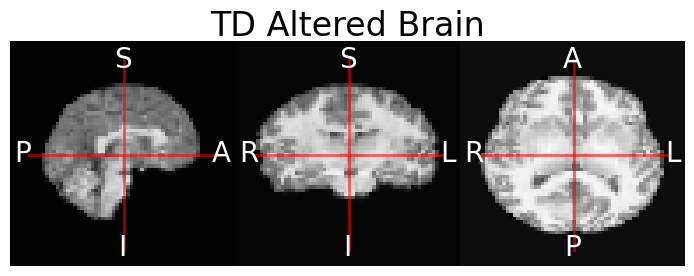

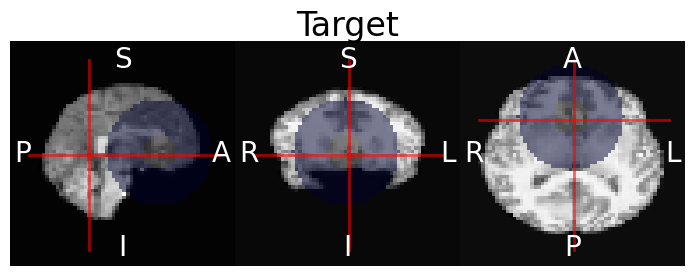

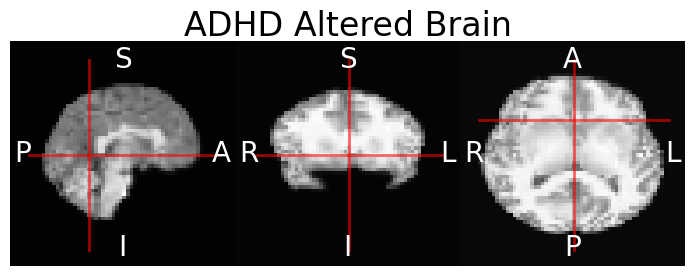

In [85]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010040_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=21, sz3=15, sz4=5, s=40)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



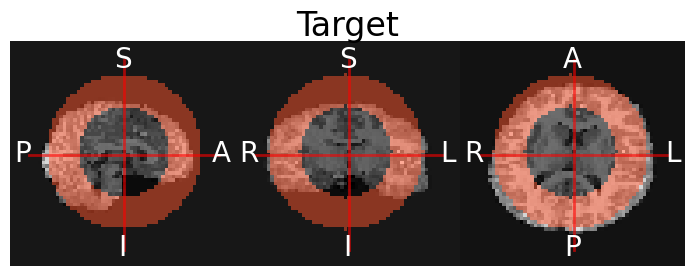

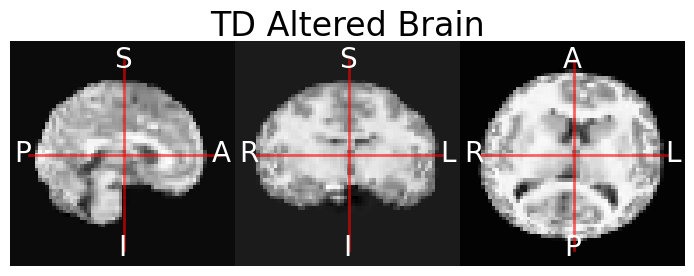

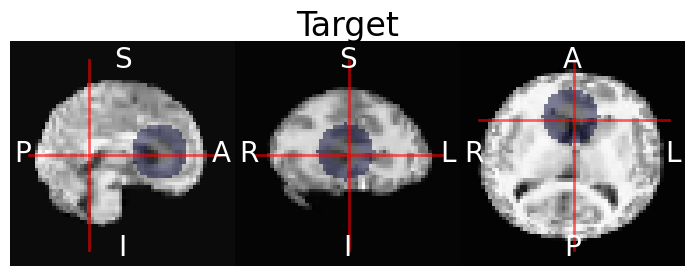

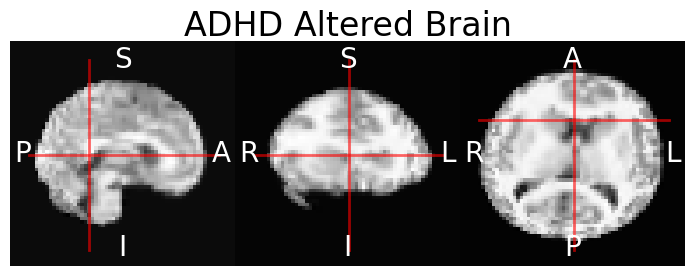

In [83]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010041_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=13, sz2=22, sz3=8, sz4=4, s=41)


/data/bergerar/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



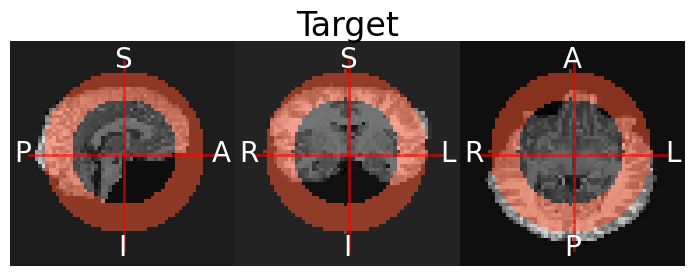

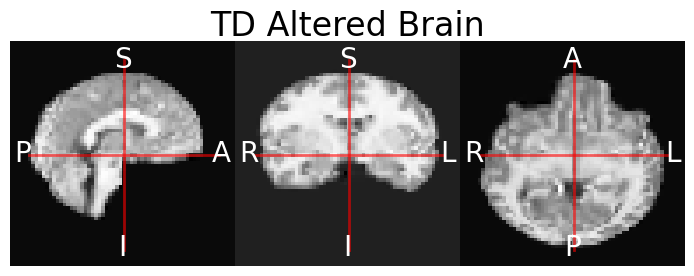

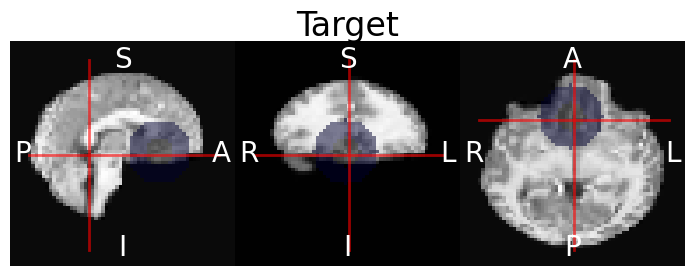

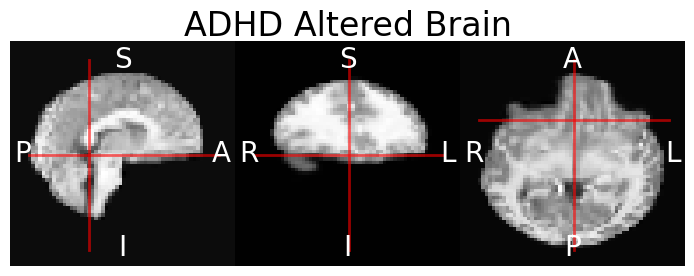

In [84]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010042_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=23, sz3=9, sz4=4, s=42)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010043_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=16, sz2=22, sz3=9, sz4=3, s=43)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010044_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=14, sz2=22, sz3=8, sz4=2, s=44)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010045_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,42,32), sz1=15, sz2=20, sz3=8, sz4=2, s=45)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010047_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=15, sz2=20, sz3=8, sz4=2, s=47)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010048_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=17, sz2=20, sz3=8, sz4=1, s=48)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010049_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=16, sz2=20, sz3=6, sz4=1, s=49)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010050_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=16, sz2=21, sz3=7, sz4=3, s=50)


In [ ]:
#sz1 and sz3 moves, sz2 and sz4 fixed
alterBrain(file='../../BC-sim/sub-0010051_Extracted_Brain-Copy1.nii.gz', coordsTD=(32,32,32), coordsADHD=(32,44,32), sz1=17, sz2=22, sz3=8, sz4=4, s=51)
